<a href="https://colab.research.google.com/github/vmr1532/kaggle-projects/blob/master/myproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/root/.kaggle/kaggle.json"
if not os.path.exists(os.path.dirname(filename)):
  os.makedirs(os.path.dirname(filename))
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

IndexError: ignored

In [1]:

from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth
auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/root/.kaggle/kaggle.json"
if not os.path.exists(os.path.dirname(filename)):
  os.makedirs(os.path.dirname(filename))
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [2]:
!pip install kaggle


In [3]:
!kaggle competitions download -c digit-recognizer

 79% 58.0M/73.2M [00:00<00:00, 164MB/s]
100% 73.2M/73.2M [00:00<00:00, 185MB/s]
 68% 33.0M/48.8M [00:00<00:00, 131MB/s]
100% 48.8M/48.8M [00:00<00:00, 162MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 28.8MB/s]


In [4]:
!ls -ltr

total 125148
drwxr-xr-x 1 root root     4096 Apr  4 20:20 sample_data
-rw-r--r-- 1 root root     2490 Apr 16 06:29 adc.json
-rw-r--r-- 1 root root 76775041 Apr 16 06:31 train.csv
-rw-r--r-- 1 root root 51118296 Apr 16 06:31 test.csv
-rw-r--r-- 1 root root   240909 Apr 16 06:31 sample_submission.csv


In [0]:


import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas

In [0]:
import csv
import numpy
train1=pandas.read_csv("train.csv")
test1=pandas.read_csv("test.csv")

In [18]:
print(train1.shape)
print(train1.info())
train1.head()


(42000, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TypeError: ignored

In [0]:
X = numpy.asarray(train1.drop('label',axis=1),dtype=numpy.float32).reshape(-1,28,28)
yhat = numpy.asarray(train1['label'])

# Generate random indices for creating a random validation set with 20% of the labelled data
validx = (numpy.random.uniform(size=len(X)) <= 0.2)

# Create training set (80% of the labelled data)
X_trn = X[~validx]
y_trn = yhat[~validx]

# Create validation set (20% of the labelled data)
X_val = X[validx]
y_val = yhat[validx]

# Create the test set
X_tes = numpy.asarray(test1,dtype=numpy.float32).reshape(-1,28,28)

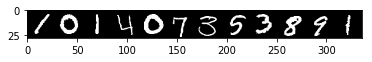

array([1, 0, 1, 4, 0, 7, 3, 5, 3, 8, 9, 1])

In [104]:
nvis = 12
plt.imshow(numpy.concatenate(X_trn[:nvis],axis=1),cmap='gray',vmin=0,vmax=255)
plt.show()

# Print the corresponding labels to check they match
y_trn[:nvis]

In [0]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
model=Sequential()
model.add(Dense(790, input_dim=780, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(480, activation='relu'))
model.add(Dense(320, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [106]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(test1.info())
print(test1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


In [111]:
model.fit(X_trn,y_trn, epochs=400, batch_size=10)

ValueError: ignored